In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

# Load Data

In [50]:
df = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")

In [51]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [52]:
df.shape

(100000, 9)

In [53]:
df.info

<bound method DataFrame.info of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              

In [54]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [55]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Splitting train and test data

In [56]:
X = df
y = X['diabetes']
X.drop(['diabetes'], axis= 1, inplace= True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [57]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
10382,Female,2.0,0,0,No Info,16.45,6.2,159
73171,Female,55.0,0,0,never,24.59,6.0,130
30938,Female,24.0,0,0,No Info,21.77,4.5,130
99310,Male,30.0,0,0,never,27.32,6.2,159
58959,Male,13.0,0,0,No Info,18.37,6.5,130


# Encoding categorical values

We verify if both of our categorical columns i.e. gender and smoking_history can be safely encoded

In [58]:
# Categorical columns in the training data
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if 
                   set(X_test[col]).issubset(set(X_train[col]))]

print(good_label_cols)

['gender', 'smoking_history']


In [59]:
# Apply ordinal encoder 
ordinal_encoder = OrdinalEncoder()
X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])
X_test[good_label_cols] = ordinal_encoder.transform(X_test[good_label_cols])

In [60]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
10382,0.0,2.0,0,0,0.0,16.45,6.2,159
73171,0.0,55.0,0,0,4.0,24.59,6.0,130
30938,0.0,24.0,0,0,0.0,21.77,4.5,130
99310,1.0,30.0,0,0,4.0,27.32,6.2,159
58959,1.0,13.0,0,0,0.0,18.37,6.5,130


# Applying the Radom Forest Classifier

In [88]:
# Testing Random forest model with various n_estimators value to find the optimum value
def return_optimum_trees(n_estimators, X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators= n_estimators, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print("For n_estimators = "+ str(n_estimators) +" accuracy score:" + str(score))

In [89]:
n_estimators_list = [50, 100, 150, 200, 500]
for estimator in n_estimators_list:
    return_optimum_trees(estimator, X_train, y_train, X_test, y_test)

For n_estimators = 50 accuracy score:0.9707
For n_estimators = 100 accuracy score:0.9709
For n_estimators = 150 accuracy score:0.9712
For n_estimators = 200 accuracy score:0.97105
For n_estimators = 500 accuracy score:0.97105


From the above we see that n_estimators value of 150 provides slightly better accuracy and accuracy actually decreases at 200 and remains stagnant at 500

In [90]:
# Creating Random forest model
model = RandomForestClassifier(n_estimators=150, random_state=0)

# Fitting the model
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=0)

In [91]:
# Predicting for test input
y_preds = model.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_preds)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[18241    56]
 [  520  1183]]


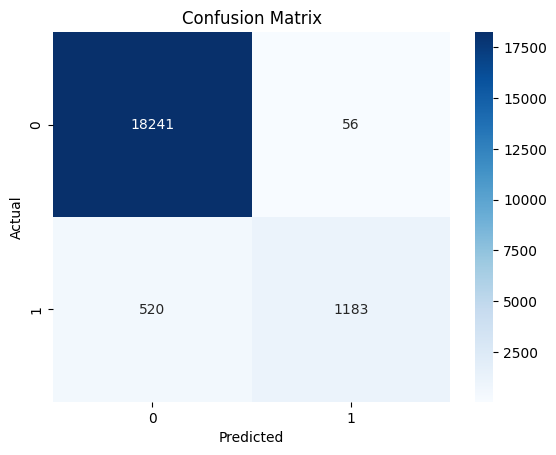

In [93]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Applying the KNN Model

In [100]:
# Testing KNN model with various n_neighbor values to find optimum value
def return_optimum_neighbors(n_neighbors, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_preds = knn.predict(X_test)
    score = accuracy_score(y_test, y_preds)
    print("accuracy for "+str(n_neighbors)+ " neighbors: "+ str(score))

In [101]:
for neighbor in range(3, 20):
    return_optimum_neighbors(neighbor, X_train, y_train, X_test, y_test)

accuracy for 3 neighbors: 0.95175
accuracy for 4 neighbors: 0.95465
accuracy for 5 neighbors: 0.9536
accuracy for 6 neighbors: 0.95405
accuracy for 7 neighbors: 0.9542
accuracy for 8 neighbors: 0.954
accuracy for 9 neighbors: 0.954
accuracy for 10 neighbors: 0.95385
accuracy for 11 neighbors: 0.95395
accuracy for 12 neighbors: 0.95335
accuracy for 13 neighbors: 0.95415
accuracy for 14 neighbors: 0.9528
accuracy for 15 neighbors: 0.9532
accuracy for 16 neighbors: 0.9521
accuracy for 17 neighbors: 0.95255
accuracy for 18 neighbors: 0.9522
accuracy for 19 neighbors: 0.95285


From the above we see 4 value for n_neighbors is optimum and it almost consistently decreases 5 onwards

In [102]:
# Creating KNN model
knn = KNeighborsClassifier(n_neighbors=4)

# Fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [103]:
# Predicting for test input
y_preds = knn.predict(X_test)

In [104]:
cm = confusion_matrix(y_test, y_preds)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[18227    70]
 [  837   866]]


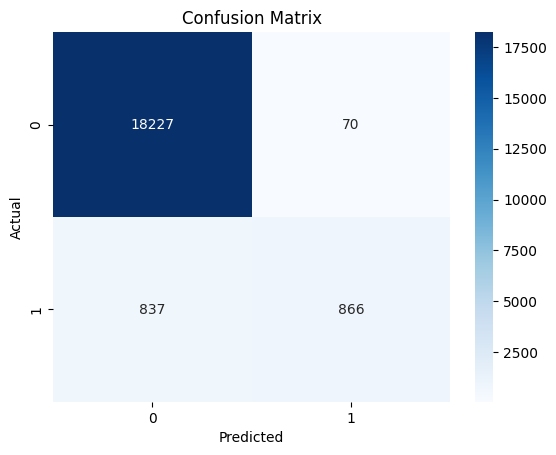

In [105]:
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()